## 1. Introdução - Apresentação das variáveis
![](https://i.imgur.com/5BU2ZvP.jpg)

O presente trabalho tem como objetivo avaliar o histórico evolutivo econômico de dois países, Brasil e Espanha, no período de 1970 até 2019, com as principais variáveis macroeconômicas já presente no banco de dados, sendo elas:

- `pop` - População (em milhões)
- `emp` - População empregada (em milhões)
- `avh` - Hora média trabalhada por ano
- `rgdpna` - PIB real a preços de 2017 (em milhões)
- `rconna` - Consumo real a preços de 2017 (em milhões)
- `rdana` - Absorção doméstica real a preços de 2017 (em milhões)
- `rnna` - Estoque de capital a preços de 2017 (em milhões)
- `rtfpna` - Produtividade Total dos Fatores (PTF) a preços de 2017


Algumas variáveis importantes para a análise não estão no banco de dados e serão criadas com uso daquelas que já estão, sendo elas:


- `rgdpc` - PIB real per capita a preços de 2017
- `rconnnapc` - Consumo real per capita a preços de 2017
- `rdanapc` - Absorção doméstica real per capita a preços de 2017
- `invest` - Investimento doméstico público e privado real a preços de 2017
- `investpc` - Investimento doméstico público e privado per capita real a preços de 2017
- `rnnaemp`- Estoque de capital por trabalhador a preços de 2017
---
<br></br>
Todos os dados foram tirados do Penn World Table (PWT). O PWT é um conjunto de informações de contas nacionais, desenvolvido e mantido pela Universidade da Califórnia (Davis) e pelo Groningen Growth Development Center da Universidade de Groningen (Holanda). Trata-se da principal base de dados para análises comparativas de desenvolvimento e crescimento econômico. Sucessivas atualizações ocorreram ao longo do tempo e atualmente revela dados sobre capital, educação, produtividade, emprego e população de 183 países para um longo período (1950-2019). A versão mais atual do banco de dados é a PWT 10.0. Esses dados podem ser obtidos gratuitamente no seguinte endereço: [Penn World Table version 10.0](http://www.rug.nl/ggdc/productivity/pwt/)

---
## 2. Obtenção dos dados e checando valores

Usaremos o banco de dados já baixado, chamado de: `pwt100.xlsx`

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('pwt100.xlsx')

In [38]:
data

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


É possível perceber que há mais de **100 países** no banco de dados da PWT, iremos filtrar só para os dois que queremos (Brasil e Espanha) e no período que desejamos (1970 até 2019):

In [39]:
# filtrando os dados por país e ano
data_brasil = data[(data['countrycode'] == 'BRA') & ((data['year'] >= 1970) & (data['year'] <= 2019))]
data_espanha = data[(data['countrycode'] == 'ESP') & ((data['year'] >= 1970) & (data['year'] <= 2019))]

### 2.1 Checando valores
Uma vez filtrado os valores que queremos do banco de dados (`data_brasil` e `data_espanha`), iremos conferir se está tudo certo:

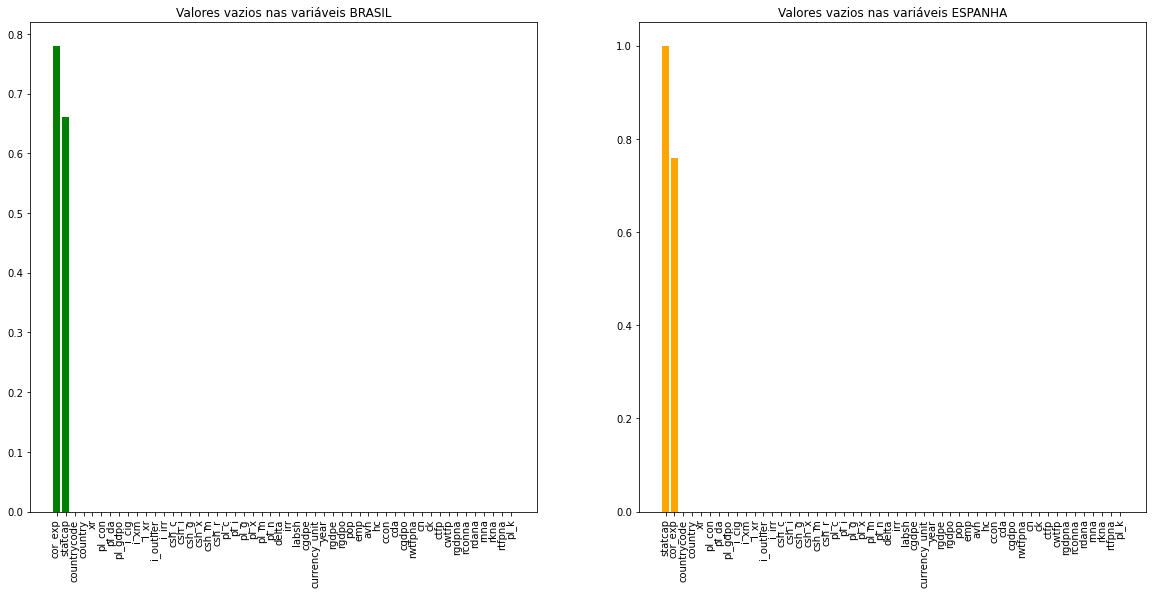

In [40]:
plt.figure(figsize=(20,9))

# subplot brasil
plt.subplot(1,2,1)
plt.bar((data_brasil.isnull().sum() / data_brasil.shape[0]).sort_values(ascending=False).index, (data_brasil.isnull().sum() / data_brasil.shape[0]).sort_values(ascending=False), color='green')
plt.xticks(rotation = 90)
plt.title("Valores vazios nas variáveis BRASIL")

# subplot espanha
plt.subplot(1,2,2)
plt.bar((data_espanha.isnull().sum() / data_espanha.shape[0]).sort_values(ascending=False).index, (data_espanha.isnull().sum() / data_espanha.shape[0]).sort_values(ascending=False), color='orange')
plt.xticks(rotation = 90)
plt.title("Valores vazios nas variáveis ESPANHA")

plt.show()

- As variáveis `cor_exp` e `statcap` apresentam, respectivamente, 78% e 66% de valores ausentes no dataset Brasil e **100%** e 76% de valores ausentes no dataset Espanha

Como não utilizaremos nenhuma das duas variáveis para qualquer análise/criação de novas variáveis, não nos interessa realizar qualquer mudança quanto a isso.

---
## 3. Criando novas variáveis

Como apresentado no começo do trabalho, iremos criar novas variáveis que não estão presentes no banco de dados.

In [41]:
with pd.option_context('mode.chained_assignment', None):
    
    # criando as novas variáveis
    data_brasil['rgdpc'] = data_brasil['rgdpna'] / data_brasil['pop']
    data_brasil['rconnapc'] = data_brasil['rconna'] / data_brasil['pop']
    data_brasil['rdanapc'] = data_brasil['rdana'] / data_brasil['pop']
    data_brasil['invest'] = data_brasil['rdana'] - data_brasil['rconna']
    data_brasil['investpc'] = data_brasil['invest'] / data_brasil['pop']
    data_brasil['rnnaemp'] = data_brasil['rnna'] / data_brasil['emp']
    
    data_espanha['rgdpc'] = data_espanha['rgdpna'] / data_espanha['pop']
    data_espanha['rconnapc'] = data_espanha['rconna'] / data_espanha['pop']
    data_espanha['rdanapc'] = data_espanha['rdana'] / data_espanha['pop']
    data_espanha['invest'] = data_espanha['rdana'] - data_espanha['rconna']
    data_espanha['investpc'] = data_espanha['invest'] / data_espanha['pop']
    data_espanha['rnnaemp'] = data_espanha['rnna'] / data_espanha['emp']
    
    # mantendo somente as colunas que iremos utilizar 
    data_brasil = data_brasil[['year','pop','emp','avh','rgdpna','rgdpc','rconna','rconnapc','rdana','rdanapc','invest','investpc','rnna','rnnaemp','rtfpna']]
    data_espanha = data_espanha[['year','pop','emp','avh','rgdpna','rgdpc','rconna','rconnapc','rdana','rdanapc','invest','investpc','rnna','rnnaemp','rtfpna']]

In [42]:
data_brasil.head()

,year,pop,emp,avh,rgdpna,rgdpc,rconna,rconnapc,rdana,rdanapc,invest,investpc,rnna,rnnaemp,rtfpna
1700,1970,95.113265,29.117331,2145.000000,586407.1875,6165.356509,458002.3750,4815.336483,604552.5000,6356.132344,146550.1250,1540.795861,1990086.75,68347.156567,1.159655
1701,1971,97.482920,30.824387,2128.540692,652905.7500,6697.642520,514692.5625,5279.822994,683057.7500,7006.947986,168365.1875,1727.124993,2165646.75,70257.578142,1.209525
1702,1972,99.859383,32.531445,2112.207682,730862.6875,7318.918519,570555.5625,5713.589904,765389.4375,7664.672207,194833.8750,1951.082303,2374560.25,72992.770007,1.265817
1703,1973,102.259497,36.504719,2096.000000,832964.1875,8145.592458,639315.1250,6251.889983,871790.3125,8525.274797,232475.1875,2273.384813,2636271.00,72217.266372,1.299862
1704,1974,104.706198,37.401508,2079.770695,900850.8125,8603.605419,701519.0000,6699.880364,963416.3750,9201.139889,261897.3750,2501.259524,2931737.75,78385.548626,1.326123


In [43]:
data_espanha.head()

,year,pop,emp,avh,rgdpna,rgdpc,rconna,rconnapc,rdana,rdanapc,invest,investpc,rnna,rnnaemp,rtfpna
3800,1970,33.883749,13.451230,1996.720457,553603.9375,16338.331909,388829.15625,11475.387692,556812.125,16433.014098,167982.96875,4957.626405,2587868.75,192389.003872,0.822920
3801,1971,34.267466,13.576461,1996.836457,579343.5625,16906.518927,408241.50000,11913.384550,573475.625,16735.279609,165234.12500,4821.895059,2747532.25,202374.704477,0.833228
3802,1972,34.664234,13.751750,1992.692456,626558.6250,18075.074874,440392.40625,12704.518619,628447.375,18129.561871,188054.96875,5425.043252,2938392.75,213674.096143,0.867229
3803,1973,35.069431,14.121267,1980.854453,675357.9375,19257.738670,473903.40625,13513.290428,683841.250,19499.639159,209937.84375,5986.348731,3158602.50,223676.985125,0.891716
3804,1974,35.476423,14.217197,1987.027455,713304.8125,20106.446822,500755.50000,14115.163189,731075.000,20607.348153,230319.50000,6492.184965,3386240.75,238179.203003,0.904634


---
## 4. Análise descritiva dos indicadores

Para cada variável apresentada no começo do trabalho, iremos fazer uma breve análise descritiva em formato de tabela para melhor visualização dos dados.

In [44]:
from IPython.display import display

for i in data_brasil.columns[1:13]:
    
    descritive = pd.DataFrame({"Brasil":[data_brasil[i].mean(), data_brasil[i].median(), data_brasil[i].std(ddof=1), data_brasil[i].min(), data_brasil[i].max()],
                          "Espanha":[data_espanha[i].mean(), data_espanha[i].median(), data_espanha[i].std(ddof=1), data_espanha[i].min(), data_espanha[i].max()]})

    descritive.set_index(pd.Index(['Média','Mediana','Desvio-Padrão','Mínimo','Máximo']), inplace=True)
    
    descritive.index.name = i

    display(descritive)

,Brasil,Espanha
pop,,
Média,157.776056,40.893079
Mediana,160.726306,39.723744
Desvio-Padrão,35.883498,4.098422
Mínimo,95.113265,33.883749
Máximo,211.049527,47.084240


,Brasil,Espanha
emp,,
Média,63.804401,15.638122
Mediana,62.220301,14.163865
Desvio-Padrão,19.230265,2.874153
Mínimo,29.117331,11.866978
Máximo,93.956825,21.006409


,Brasil,Espanha
avh,,
Média,1878.753514,1794.132333
Mediana,1856.615848,1751.963314
Desvio-Padrão,122.342544,107.946081
Mínimo,1706.057169,1685.951506
Máximo,2145.000000,2006.966459


,Brasil,Espanha
rgdpna,,
Média,1.882772e+06,1.209651e+06
Mediana,1.778978e+06,1.122215e+06
Desvio-Padrão,7.492718e+05,4.205261e+05
Mínimo,5.864072e+05,5.536039e+05
Máximo,3.140662e+06,1.896315e+06


,Brasil,Espanha
rgdpc,,
Média,11470.049198,28893.412472
Mediana,11207.240075,28249.948737
Desvio-Padrão,2255.687531,7495.748568
Mínimo,6165.356509,16338.331909
Máximo,15544.059859,40574.372845


,Brasil,Espanha
rconna,,
Média,1.487151e+06,8.896376e+05
Mediana,1.417648e+06,8.351052e+05
Desvio-Padrão,6.344829e+05,3.164192e+05
Mínimo,4.580024e+05,3.888292e+05
Máximo,2.590204e+06,1.360894e+06


,Brasil,Espanha
rconnapc,,
Média,9007.331800,21229.212185
Mediana,8785.441536,21079.573787
Desvio-Padrão,2005.289572,5685.080987
Mínimo,4815.336483,11475.387692
Máximo,12774.490709,29118.263314


,Brasil,Espanha
rdana,,
Média,1.894176e+06,1.230998e+06
Mediana,1.800861e+06,1.148473e+06
Desvio-Padrão,7.675797e+05,4.427571e+05
Mínimo,6.045525e+05,5.568121e+05
Máximo,3.282183e+06,1.923023e+06


,Brasil,Espanha
rdanapc,,
Média,11543.242640,29386.641631
Mediana,11355.401608,29002.360029
Desvio-Padrão,2337.824568,8074.415146
Mínimo,6356.132344,16433.014098
Máximo,16267.322427,42330.233065


,Brasil,Espanha
invest,,
Média,407024.937500,341360.208750
Mediana,389462.906250,318823.375000
Desvio-Padrão,142226.161661,131547.785014
Mínimo,146550.125000,165234.125000
Máximo,728842.000000,607322.750000


,Brasil,Espanha
investpc,,
Média,2535.910840,8157.429445
Mediana,2506.741581,8068.396705
Desvio-Padrão,472.424222,2530.517344
Mínimo,1540.795861,4744.041329
Máximo,3625.431858,13368.591296


,Brasil,Espanha
rnna,,
Média,7.981891e+06,7.102308e+06
Mediana,7.926046e+06,6.652300e+06
Desvio-Padrão,3.468731e+06,2.917429e+06
Mínimo,1.990087e+06,2.587869e+06
Máximo,1.371648e+07,1.173352e+07


Com essas tabelas, podemos ter uma rápida descrição dos dados para cada indicador. Como, por exemplo, o desvio padrão da população empregada brasileira é bem maior em comparação a da Espanha. Esses dados ficarão mais fáceis de serem visualizados com os gráficos.

---
### 4.1 Salvando DataFrames

Para facilitar o uso dessas tabelas, salvarei cada uma delas em um arquivo .docx já formatada

In [45]:
import docx
from docx.shared import Pt
from docx.enum.table import WD_TABLE_ALIGNMENT, WD_ALIGN_VERTICAL


for i in data_brasil.columns[1:13]:
    
    descritive = pd.DataFrame({"Estatística":[1,'Média','Mediana','Desvio-Padrão','Mínimo','Máximo'],
                               "Brasil":[1,round(data_brasil[i].mean(),3), round(data_brasil[i].median(),3), round(data_brasil[i].std(ddof=1),3), round(data_brasil[i].min(),3), round(data_brasil[i].max(),3)],
                               "Espanha":[1,round(data_espanha[i].mean(),3), round(data_espanha[i].median(),3), round(data_espanha[i].std(ddof=1),3), round(data_espanha[i].min(),3), round(data_espanha[i].max(),3)]})
    
    #Abre um documento
    doc = docx.Document()

    ########## Opcional - Sem relação direta com a tabela ##############

    sec    = doc.sections[0] #Pega a primeira seção do documento
    header = sec.header      #Intância do cabeçalho
    footer = sec.footer      #Instância do rodapé

    header.paragraphs[0].text = '' #texto do cabeçalho
    footer.paragraphs[0].text = ''    #texto do rodapé

    #Adiciona um título
    doc.add_heading('Tabela proveniente de um DataFrame', 1)

    #Adiciona um parágrafo com um texto descritivo
    doc.add_paragraph(f'Esta Tabela representa uma análise descritiva da variável "{i}" da base de dados PWT (Penn World Table 10.0).\n\n')

    ####################################################################

    #Obtém o número de linhas e colunas que a tabela deverá ter
    n_rows = descritive.shape[0]
    n_cols = descritive.shape[1]

    #Adiciona uma tabela ao documento
    #com n_rows linhas e n_cols colunas
    table = doc.add_table(rows=n_rows, cols=n_cols)
    table.style = 'Table Grid'
    table.name = 'Arial'
    
    ######################## Opcional - Relativo à formatação ################################

    table.alignment = WD_TABLE_ALIGNMENT.CENTER #alinhamento da tabela na página
    table.autofit   = True                      #autoajuste da coluna

    ##########################################################################################

    #Itera pelos dados do DataFrame e insere as celúlas com o conteúdo
    for col_ins, col_label in enumerate(descritive):
        # col_ins:   número da coluna
        # col_label: rótulo da colua

        for row_ins in range(n_rows):

            #Insere o conteúdo na célula, com linha row_ins e coluna col_ins
            cell_ = table.cell(row_ins, col_ins)

            if row_ins == 0:
                #Adiciona o cabeçalho da tabela
                cell_.text = descritive.columns[col_ins]
            else:
                #Adiciona os dados da tabela
                cell_.text = str(descritive[col_label][row_ins])

            ######################## Opcional - Relativo à formatação ################################

            cell_.vertical_alignment = WD_ALIGN_VERTICAL.CENTER #alinhamento vertical da célula
            cell_.width              = 100                      #largura, é afetado por table.autofit

            ##########################################################################################

    #Salva o documento
    doc.save(f'{i}.docx')
    print(f"Tabela da variável {i} salva como docx!")

Tabela da variável pop salva como docx!
Tabela da variável emp salva como docx!
Tabela da variável avh salva como docx!
Tabela da variável rgdpna salva como docx!
Tabela da variável rgdpc salva como docx!
Tabela da variável rconna salva como docx!
Tabela da variável rconnapc salva como docx!
Tabela da variável rdana salva como docx!
Tabela da variável rdanapc salva como docx!
Tabela da variável invest salva como docx!
Tabela da variável investpc salva como docx!
Tabela da variável rnna salva como docx!


---
## 5. Gráficos dos indicadores

Para uma visualização melhor e mais fácil, a criação de gráficos para avaliar os dados é essencial. Faremos um gráfico para cada variável

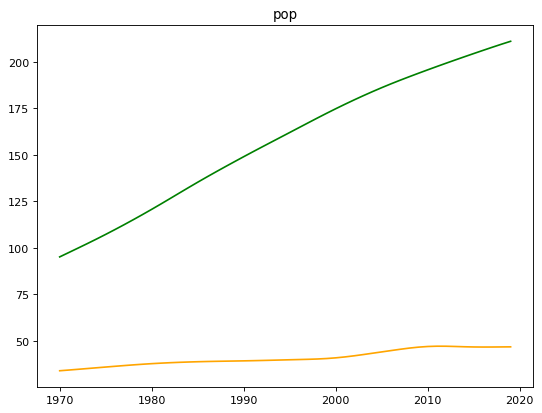

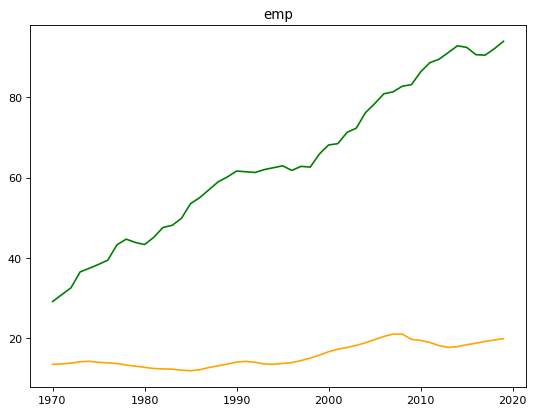

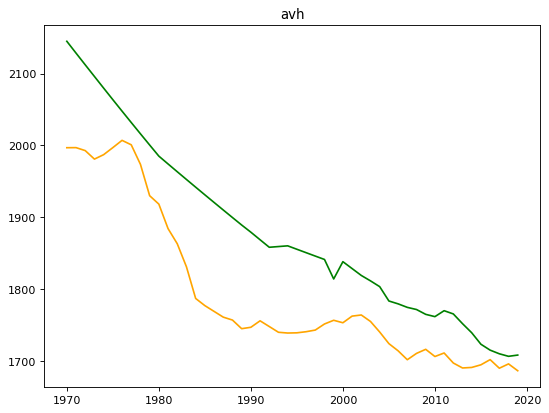

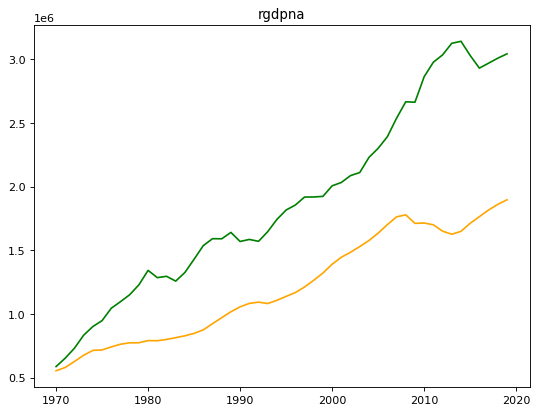

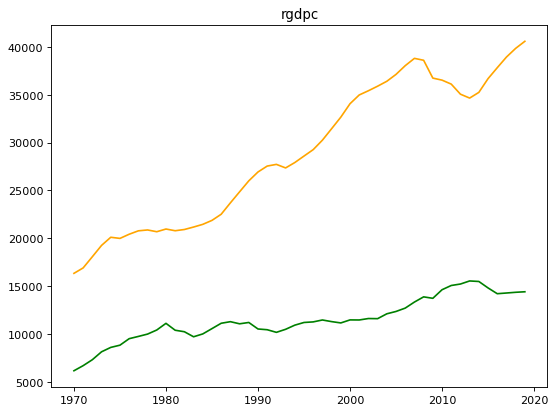

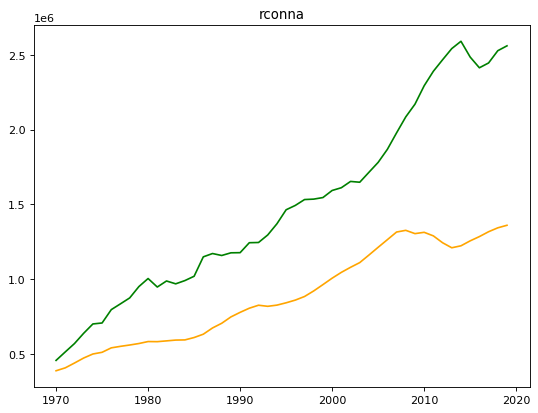

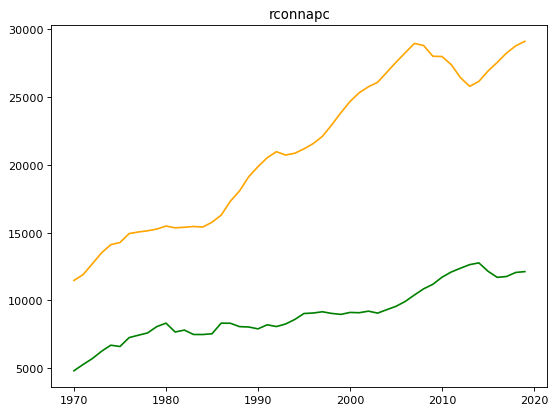

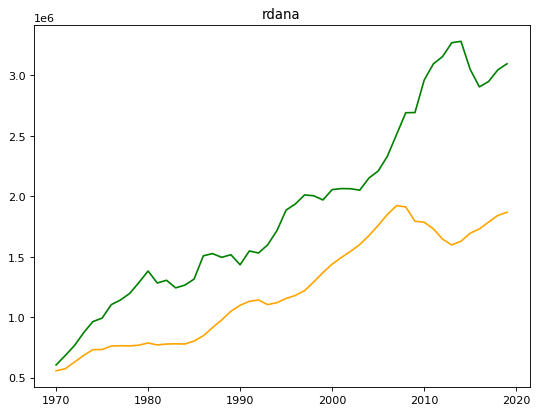

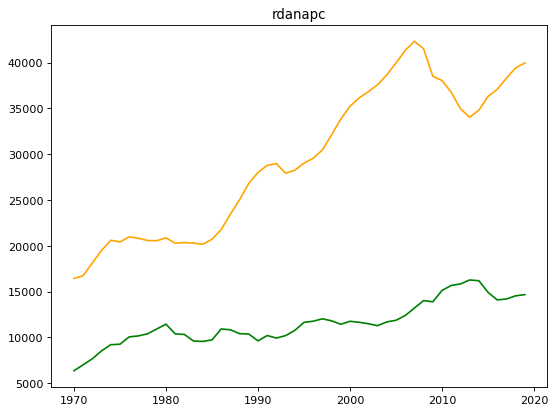

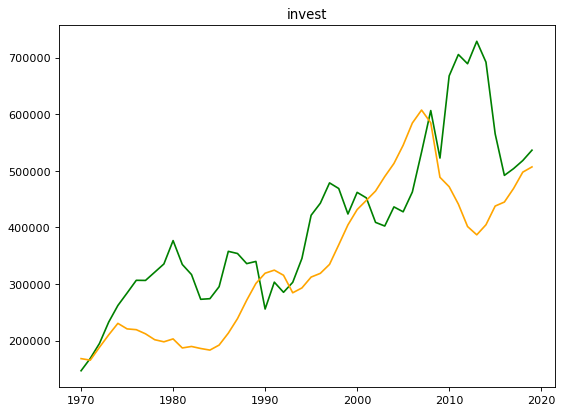

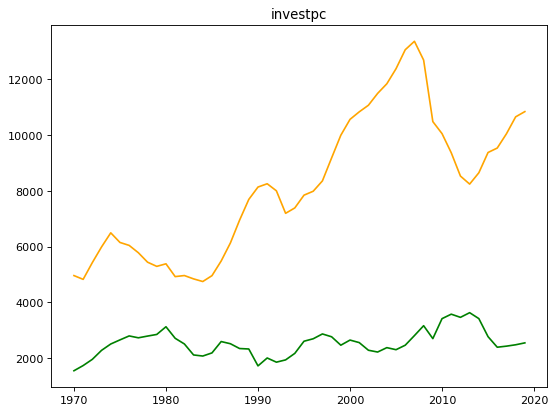

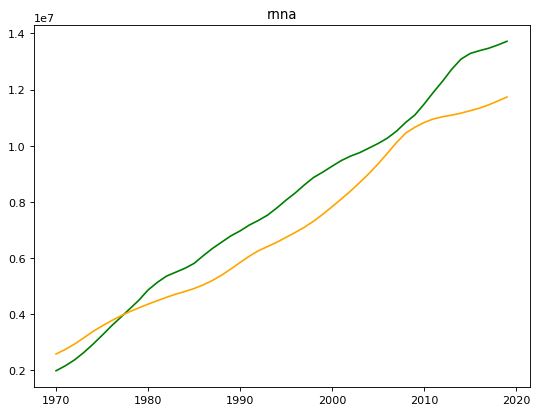

In [55]:


for i in data_brasil.columns[1:13]:
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(data_brasil['year'],data_brasil[i], color='green')
    plt.plot(data_espanha['year'],data_espanha[i], color='orange')
    plt.title(i)

    plt.show()